In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import pickle
from gensim.models import word2vec
import logging
import random

In [2]:
from OpenFabLibrary import JeibaCutWords
from OpenFabLibrary import AppendKeywordCheck

C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [3]:
LEAGAL_CLASS = 0
VIOLATE_CLASS = 1

### 讀取training set data

In [4]:
data_dir = "/".join((".", "data"))
data_source = "train.csv"
data_df = pd.read_csv(open(data_dir + '/' + data_source, 'r', encoding='utf8'), delimiter=',')
print("違法廣告: %d則" % (data_df[data_df["Class"] == 1].shape[0]))
print("合法廣告: %d則" % (data_df[data_df["Class"] == 0].shape[0]))
print(data_df.head())

違法廣告: 583則
合法廣告: 354則
   ID            Name                                        Description  \
0   0  鹼性王梅精飴禮盒(5包/盒)    「參與糖分代謝…抑制壞菌生長…遠離疾病…延年益壽」「骨質疏鬆症是僅次於心血管問題的第2大疾病」   
1   1           舒眠晚安粉  「增強抵抗力...而當長期處於熬夜、壓力大的生理狀態下...造成易倦、代謝下降及情緒不穩等問...   
2   2  長庚研發元氣草本清晰靈光專案  「磷脂醯絲氨酸升記憶、促進大腦新陳代謝...改善阿茲海默氏症症狀，提升代謝力14.8%、減少...   
3   3  長庚研發緩釋B群能量滿分專案  「長庚醫學團隊研發，新陳代謝科、減重門診、家醫科指定處方...女試用者竹庭口述：懷孕胖28公...   
4   4           夜爆燃膠囊  淨化腸胃好健康…促進腸胃蠕動…瘦身…燃燒脂肪…減肥藥…瘦的有線條…控制肥腰肚…長期便秘…毒素...   

   Class  
0      1  
1      1  
2      1  
3      1  
4      1  


### 斷詞方法選擇

In [5]:
# 斷詞處理
train_data_df = JeibaCutWords(data_df)
print(train_data_df.head())

Building prefix dict from C:\Users\User\Desktop\AIGO\Jeiba\dict.txt.big ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.ub75bbb3384af150c32db207c6bfbd71d.cache
Loading model cost 1.503 seconds.
Prefix dict has been built succesfully.


   id                                           sentence  class
0   0  [參與, 糖分, 代謝, 抑制, 壞菌, 生長, 遠離, 疾病, 延年益壽, 益壽, 骨質,...      1
1   1  [增強, 抵抗, 抵抗力, 抗力, 長期, 處於, 熬夜, 壓力, 生理, 狀態, 下, 造...      1
2   2  [磷脂, 醯, 絲氨酸, 氨酸, 升, 記憶, 促進, 大腦, 新陳代謝, 代謝, 改善, ...      1
3   3  [長庚, 醫學, 團隊, 研發, 新陳代謝, 代謝, 科, 減重, 門診, 家, 醫科, 指...      1
4   4  [淨化, 腸胃, 好, 健康, 促進, 腸胃, 蠕動, 瘦身, 燃燒, 脂肪, 減肥, 減肥...      1


### 關鍵字檢查

In [6]:
# 關鍵字檢查
train_data_df['keyword_flag'], _ = AppendKeywordCheck(train_data_df)
print(train_data_df.head(5))

# 儲存為pickle格式檔案
with open(data_dir + '/' + 'train_tokenized', 'wb') as file:
    pickle.dump(train_data_df, file)

   id                                           sentence  class  keyword_flag
0   0  [參與, 糖分, 代謝, 抑制, 壞菌, 生長, 遠離, 疾病, 延年益壽, 益壽, 骨質,...      1             1
1   1  [增強, 抵抗, 抵抗力, 抗力, 長期, 處於, 熬夜, 壓力, 生理, 狀態, 下, 造...      1             1
2   2  [磷脂, 醯, 絲氨酸, 氨酸, 升, 記憶, 促進, 大腦, 新陳代謝, 代謝, 改善, ...      1             1
3   3  [長庚, 醫學, 團隊, 研發, 新陳代謝, 代謝, 科, 減重, 門診, 家, 醫科, 指...      1             1
4   4  [淨化, 腸胃, 好, 健康, 促進, 腸胃, 蠕動, 瘦身, 燃燒, 脂肪, 減肥, 減肥...      1             1


## 製作文字雲

合法廣告文字雲:


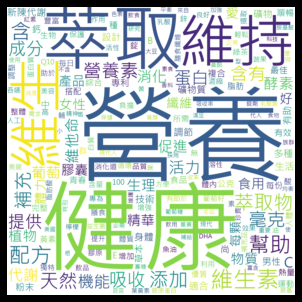

違法廣告文字雲:


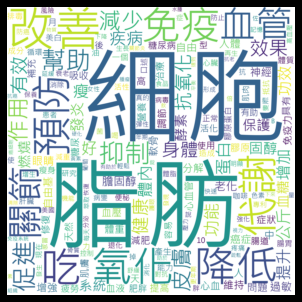

In [7]:
from OpenFabLibrary import ShowWordCloud

with open(data_dir + '/' + 'train_tokenized', 'rb') as file:
    train_tokenized_df = pickle.load(file)

ShowWordCloud(train_tokenized_df)

# Word2Vec轉換

In [8]:
with open(data_dir + '/' + 'train_tokenized', 'rb') as file:
    train_tokenized_df = pickle.load(file)

corpus_source = train_tokenized_df['sentence']
print(corpus_source)

0      [參與, 糖分, 代謝, 抑制, 壞菌, 生長, 遠離, 疾病, 延年益壽, 益壽, 骨質,...
1      [增強, 抵抗, 抵抗力, 抗力, 長期, 處於, 熬夜, 壓力, 生理, 狀態, 下, 造...
2      [磷脂, 醯, 絲氨酸, 氨酸, 升, 記憶, 促進, 大腦, 新陳代謝, 代謝, 改善, ...
3      [長庚, 醫學, 團隊, 研發, 新陳代謝, 代謝, 科, 減重, 門診, 家, 醫科, 指...
4      [淨化, 腸胃, 好, 健康, 促進, 腸胃, 蠕動, 瘦身, 燃燒, 脂肪, 減肥, 減肥...
                             ...                        
932    [熟齡, 男性, 營養, 補助, 補助品, 增添, 男性, 魅力, 含, 強健, 成分, 燕...
933    [膠原, 膠原蛋白, 蛋白, 馬, 胎盤, 日本, 本原, 原裝, 裝進, 進口, 每瓶, ...
934    [獨特, 天然, 防曬, 配方, 每份, 含有, 黃金, 番茄, 粉末, 660, 毫克, ...
935    [檸檬, 蘋果, 蘋果酸, 果酸, 鈣, 形式, 錠, 含有, 800, 毫克, 吸收, 收...
936    [雙效, 合一, 一發, 發酵, 配方, 日本, 本原, 原裝, 裝進, 進口, 天然, 納...
Name: sentence, Length: 937, dtype: object


### 設定Word2Vec參數並訓練詞向量

In [9]:
WORD2VEC_DIMENTION = 128
logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)

def TrainWord2VecModel(input_corpus):
    # build word2vec
    # sg=0 CBOW ; sg=1 skip-gram
    model = word2vec.Word2Vec(size=WORD2VEC_DIMENTION, min_count=5, window=5, sg=0)

    # build vocabulary
    model.build_vocab(input_corpus)

    # train word2vec model ; shuffle data every epoch
    for i in range(20):
        print("%d-th training" % (i))
        random.shuffle(input_corpus)
        model.train(input_corpus, total_examples=len(input_corpus), epochs=1)

    ## save model
    model.save('word2vec_model/CBOW')

In [10]:
# 若要用已經訓練好的詞向量，這一步可以不做
# 若要訓練新的詞向量，把註解拿掉
# 現階段使用pre-trained mode zh, 300d, 50101 words
TrainWord2VecModel(corpus_source)

2020-02-03 14:53:18,634: INFO: collecting all words and their counts
2020-02-03 14:53:18,639: INFO: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-02-03 14:53:18,661: INFO: collected 8954 word types from a corpus of 53344 raw words and 937 sentences
2020-02-03 14:53:18,664: INFO: Loading a fresh vocabulary
2020-02-03 14:53:18,676: INFO: effective_min_count=5 retains 2237 unique words (24% of original 8954, drops 6717)
2020-02-03 14:53:18,678: INFO: effective_min_count=5 leaves 42202 word corpus (79% of original 53344, drops 11142)
2020-02-03 14:53:18,692: INFO: deleting the raw counts dictionary of 8954 items
2020-02-03 14:53:18,694: INFO: sample=0.001 downsamples 49 most-common words
2020-02-03 14:53:18,695: INFO: downsampling leaves estimated 40127 word corpus (95.1% of prior 42202)
2020-02-03 14:53:18,706: INFO: estimated required memory for 2237 words and 128 dimensions: 3409188 bytes
2020-02-03 14:53:18,707: INFO: resetting layer weights
C:\Users\User\Anaco

0-th training


2020-02-03 14:53:19,381: INFO: worker thread finished; awaiting finish of 2 more threads
2020-02-03 14:53:19,382: INFO: worker thread finished; awaiting finish of 1 more threads
2020-02-03 14:53:19,384: INFO: worker thread finished; awaiting finish of 0 more threads
2020-02-03 14:53:19,385: INFO: EPOCH - 1 : training on 53344 raw words (40118 effective words) took 0.0s, 1034999 effective words/s
2020-02-03 14:53:19,389: INFO: training on a 53344 raw words (40118 effective words) took 0.0s, 891715 effective words/s
2020-02-03 14:53:19,390: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-02-03 14:53:19,571: WARNING: Effective 'alpha' higher than previous training cycles


1-th training


2020-02-03 14:53:19,572: INFO: training model with 3 workers on 2237 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-02-03 14:53:19,608: INFO: worker thread finished; awaiting finish of 2 more threads
2020-02-03 14:53:19,610: INFO: worker thread finished; awaiting finish of 1 more threads
2020-02-03 14:53:19,620: INFO: worker thread finished; awaiting finish of 0 more threads
2020-02-03 14:53:19,622: INFO: EPOCH - 1 : training on 53344 raw words (40120 effective words) took 0.0s, 856263 effective words/s
2020-02-03 14:53:19,624: INFO: training on a 53344 raw words (40120 effective words) took 0.1s, 784469 effective words/s
2020-02-03 14:53:19,625: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-02-03 14:53:19,809: WARNING: Effective 'alpha' higher than previous training cycles


2-th training


2020-02-03 14:53:19,810: INFO: training model with 3 workers on 2237 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-02-03 14:53:19,848: INFO: worker thread finished; awaiting finish of 2 more threads
2020-02-03 14:53:19,850: INFO: worker thread finished; awaiting finish of 1 more threads
2020-02-03 14:53:19,851: INFO: worker thread finished; awaiting finish of 0 more threads
2020-02-03 14:53:19,852: INFO: EPOCH - 1 : training on 53344 raw words (40127 effective words) took 0.0s, 1037748 effective words/s
2020-02-03 14:53:19,853: INFO: training on a 53344 raw words (40127 effective words) took 0.0s, 955616 effective words/s
2020-02-03 14:53:19,853: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-02-03 14:53:20,037: WARNING: Effective 'alpha' higher than previous training cycles


3-th training


2020-02-03 14:53:20,038: INFO: training model with 3 workers on 2237 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-02-03 14:53:20,072: INFO: worker thread finished; awaiting finish of 2 more threads
2020-02-03 14:53:20,076: INFO: worker thread finished; awaiting finish of 1 more threads
2020-02-03 14:53:20,079: INFO: worker thread finished; awaiting finish of 0 more threads
2020-02-03 14:53:20,081: INFO: EPOCH - 1 : training on 53344 raw words (40122 effective words) took 0.0s, 1037928 effective words/s
2020-02-03 14:53:20,082: INFO: training on a 53344 raw words (40122 effective words) took 0.0s, 914528 effective words/s
2020-02-03 14:53:20,084: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-02-03 14:53:20,265: WARNING: Effective 'alpha' higher than previous training cycles
2020-02-03 14:53:20,265: INFO: training model with 3 workers on 2237 vocabulary and 128 features, using sg=0 hs=0 samp

4-th training


2020-02-03 14:53:20,297: INFO: worker thread finished; awaiting finish of 2 more threads
2020-02-03 14:53:20,302: INFO: worker thread finished; awaiting finish of 1 more threads
2020-02-03 14:53:20,307: INFO: worker thread finished; awaiting finish of 0 more threads
2020-02-03 14:53:20,308: INFO: EPOCH - 1 : training on 53344 raw words (40139 effective words) took 0.0s, 1011741 effective words/s
2020-02-03 14:53:20,311: INFO: training on a 53344 raw words (40139 effective words) took 0.0s, 898900 effective words/s
2020-02-03 14:53:20,316: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-02-03 14:53:20,495: WARNING: Effective 'alpha' higher than previous training cycles
2020-02-03 14:53:20,496: INFO: training model with 3 workers on 2237 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5


5-th training


2020-02-03 14:53:20,530: INFO: worker thread finished; awaiting finish of 2 more threads
2020-02-03 14:53:20,535: INFO: worker thread finished; awaiting finish of 1 more threads
2020-02-03 14:53:20,537: INFO: worker thread finished; awaiting finish of 0 more threads
2020-02-03 14:53:20,539: INFO: EPOCH - 1 : training on 53344 raw words (40158 effective words) took 0.0s, 1023746 effective words/s
2020-02-03 14:53:20,540: INFO: training on a 53344 raw words (40158 effective words) took 0.0s, 914459 effective words/s
2020-02-03 14:53:20,544: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-02-03 14:53:20,732: WARNING: Effective 'alpha' higher than previous training cycles
2020-02-03 14:53:20,732: INFO: training model with 3 workers on 2237 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5


6-th training


2020-02-03 14:53:20,769: INFO: worker thread finished; awaiting finish of 2 more threads
2020-02-03 14:53:20,771: INFO: worker thread finished; awaiting finish of 1 more threads
2020-02-03 14:53:20,777: INFO: worker thread finished; awaiting finish of 0 more threads
2020-02-03 14:53:20,779: INFO: EPOCH - 1 : training on 53344 raw words (40160 effective words) took 0.0s, 1010201 effective words/s
2020-02-03 14:53:20,779: INFO: training on a 53344 raw words (40160 effective words) took 0.0s, 915112 effective words/s
2020-02-03 14:53:20,780: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-02-03 14:53:20,962: WARNING: Effective 'alpha' higher than previous training cycles
2020-02-03 14:53:20,963: INFO: training model with 3 workers on 2237 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5


7-th training


2020-02-03 14:53:21,007: INFO: worker thread finished; awaiting finish of 2 more threads
2020-02-03 14:53:21,009: INFO: worker thread finished; awaiting finish of 1 more threads
2020-02-03 14:53:21,017: INFO: worker thread finished; awaiting finish of 0 more threads
2020-02-03 14:53:21,022: INFO: EPOCH - 1 : training on 53344 raw words (40051 effective words) took 0.1s, 736680 effective words/s
2020-02-03 14:53:21,023: INFO: training on a 53344 raw words (40051 effective words) took 0.1s, 673727 effective words/s
2020-02-03 14:53:21,025: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-02-03 14:53:21,208: WARNING: Effective 'alpha' higher than previous training cycles
2020-02-03 14:53:21,209: INFO: training model with 3 workers on 2237 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5


8-th training


2020-02-03 14:53:21,241: INFO: worker thread finished; awaiting finish of 2 more threads
2020-02-03 14:53:21,246: INFO: worker thread finished; awaiting finish of 1 more threads
2020-02-03 14:53:21,253: INFO: worker thread finished; awaiting finish of 0 more threads
2020-02-03 14:53:21,254: INFO: EPOCH - 1 : training on 53344 raw words (40140 effective words) took 0.0s, 988925 effective words/s
2020-02-03 14:53:21,255: INFO: training on a 53344 raw words (40140 effective words) took 0.0s, 895104 effective words/s
2020-02-03 14:53:21,255: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-02-03 14:53:21,435: WARNING: Effective 'alpha' higher than previous training cycles
2020-02-03 14:53:21,436: INFO: training model with 3 workers on 2237 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5


9-th training


2020-02-03 14:53:21,469: INFO: worker thread finished; awaiting finish of 2 more threads
2020-02-03 14:53:21,471: INFO: worker thread finished; awaiting finish of 1 more threads
2020-02-03 14:53:21,477: INFO: worker thread finished; awaiting finish of 0 more threads
2020-02-03 14:53:21,478: INFO: EPOCH - 1 : training on 53344 raw words (40148 effective words) took 0.0s, 1051917 effective words/s
2020-02-03 14:53:21,483: INFO: training on a 53344 raw words (40148 effective words) took 0.0s, 866387 effective words/s
2020-02-03 14:53:21,484: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-02-03 14:53:21,662: WARNING: Effective 'alpha' higher than previous training cycles
2020-02-03 14:53:21,663: INFO: training model with 3 workers on 2237 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5


10-th training


2020-02-03 14:53:21,706: INFO: worker thread finished; awaiting finish of 2 more threads
2020-02-03 14:53:21,707: INFO: worker thread finished; awaiting finish of 1 more threads
2020-02-03 14:53:21,707: INFO: worker thread finished; awaiting finish of 0 more threads
2020-02-03 14:53:21,708: INFO: EPOCH - 1 : training on 53344 raw words (40094 effective words) took 0.0s, 951241 effective words/s
2020-02-03 14:53:21,709: INFO: training on a 53344 raw words (40094 effective words) took 0.0s, 877017 effective words/s
2020-02-03 14:53:21,710: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-02-03 14:53:21,895: WARNING: Effective 'alpha' higher than previous training cycles


11-th training


2020-02-03 14:53:21,896: INFO: training model with 3 workers on 2237 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-02-03 14:53:21,931: INFO: worker thread finished; awaiting finish of 2 more threads
2020-02-03 14:53:21,932: INFO: worker thread finished; awaiting finish of 1 more threads
2020-02-03 14:53:21,937: INFO: worker thread finished; awaiting finish of 0 more threads
2020-02-03 14:53:21,938: INFO: EPOCH - 1 : training on 53344 raw words (40079 effective words) took 0.0s, 1050912 effective words/s
2020-02-03 14:53:21,941: INFO: training on a 53344 raw words (40079 effective words) took 0.0s, 897136 effective words/s
2020-02-03 14:53:21,943: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-02-03 14:53:22,122: WARNING: Effective 'alpha' higher than previous training cycles


12-th training


2020-02-03 14:53:22,124: INFO: training model with 3 workers on 2237 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-02-03 14:53:22,157: INFO: worker thread finished; awaiting finish of 2 more threads
2020-02-03 14:53:22,160: INFO: worker thread finished; awaiting finish of 1 more threads
2020-02-03 14:53:22,167: INFO: worker thread finished; awaiting finish of 0 more threads
2020-02-03 14:53:22,169: INFO: EPOCH - 1 : training on 53344 raw words (40071 effective words) took 0.0s, 974053 effective words/s
2020-02-03 14:53:22,170: INFO: training on a 53344 raw words (40071 effective words) took 0.0s, 885981 effective words/s
2020-02-03 14:53:22,170: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-02-03 14:53:22,346: WARNING: Effective 'alpha' higher than previous training cycles
2020-02-03 14:53:22,347: INFO: training model with 3 workers on 2237 vocabulary and 128 features, using sg=0 hs=0 sampl

13-th training


2020-02-03 14:53:22,382: INFO: worker thread finished; awaiting finish of 1 more threads
2020-02-03 14:53:22,389: INFO: worker thread finished; awaiting finish of 0 more threads
2020-02-03 14:53:22,390: INFO: EPOCH - 1 : training on 53344 raw words (40128 effective words) took 0.0s, 1015879 effective words/s
2020-02-03 14:53:22,393: INFO: training on a 53344 raw words (40128 effective words) took 0.0s, 885714 effective words/s
2020-02-03 14:53:22,394: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-02-03 14:53:22,573: WARNING: Effective 'alpha' higher than previous training cycles
2020-02-03 14:53:22,574: INFO: training model with 3 workers on 2237 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5


14-th training


2020-02-03 14:53:22,607: INFO: worker thread finished; awaiting finish of 2 more threads
2020-02-03 14:53:22,609: INFO: worker thread finished; awaiting finish of 1 more threads
2020-02-03 14:53:22,613: INFO: worker thread finished; awaiting finish of 0 more threads
2020-02-03 14:53:22,614: INFO: EPOCH - 1 : training on 53344 raw words (40174 effective words) took 0.0s, 1150122 effective words/s
2020-02-03 14:53:22,618: INFO: training on a 53344 raw words (40174 effective words) took 0.0s, 927254 effective words/s
2020-02-03 14:53:22,619: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-02-03 14:53:22,796: WARNING: Effective 'alpha' higher than previous training cycles


15-th training


2020-02-03 14:53:22,797: INFO: training model with 3 workers on 2237 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-02-03 14:53:22,831: INFO: worker thread finished; awaiting finish of 2 more threads
2020-02-03 14:53:22,833: INFO: worker thread finished; awaiting finish of 1 more threads
2020-02-03 14:53:22,837: INFO: worker thread finished; awaiting finish of 0 more threads
2020-02-03 14:53:22,839: INFO: EPOCH - 1 : training on 53344 raw words (40132 effective words) took 0.0s, 1460969 effective words/s
2020-02-03 14:53:22,840: INFO: training on a 53344 raw words (40132 effective words) took 0.0s, 958265 effective words/s
2020-02-03 14:53:22,840: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-02-03 14:53:23,024: WARNING: Effective 'alpha' higher than previous training cycles
2020-02-03 14:53:23,025: INFO: training model with 3 workers on 2237 vocabulary and 128 features, using sg=0 hs=0 samp

16-th training


2020-02-03 14:53:23,059: INFO: worker thread finished; awaiting finish of 2 more threads
2020-02-03 14:53:23,061: INFO: worker thread finished; awaiting finish of 1 more threads
2020-02-03 14:53:23,065: INFO: worker thread finished; awaiting finish of 0 more threads
2020-02-03 14:53:23,066: INFO: EPOCH - 1 : training on 53344 raw words (40174 effective words) took 0.0s, 1079562 effective words/s
2020-02-03 14:53:23,069: INFO: training on a 53344 raw words (40174 effective words) took 0.0s, 916477 effective words/s
2020-02-03 14:53:23,072: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-02-03 14:53:23,249: WARNING: Effective 'alpha' higher than previous training cycles
2020-02-03 14:53:23,250: INFO: training model with 3 workers on 2237 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5


17-th training


2020-02-03 14:53:23,292: INFO: worker thread finished; awaiting finish of 2 more threads
2020-02-03 14:53:23,294: INFO: worker thread finished; awaiting finish of 1 more threads
2020-02-03 14:53:23,295: INFO: worker thread finished; awaiting finish of 0 more threads
2020-02-03 14:53:23,296: INFO: EPOCH - 1 : training on 53344 raw words (40154 effective words) took 0.0s, 1043510 effective words/s
2020-02-03 14:53:23,298: INFO: training on a 53344 raw words (40154 effective words) took 0.0s, 853414 effective words/s
2020-02-03 14:53:23,299: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-02-03 14:53:23,477: WARNING: Effective 'alpha' higher than previous training cycles
2020-02-03 14:53:23,479: INFO: training model with 3 workers on 2237 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5


18-th training


2020-02-03 14:53:23,521: INFO: worker thread finished; awaiting finish of 2 more threads
2020-02-03 14:53:23,522: INFO: worker thread finished; awaiting finish of 1 more threads
2020-02-03 14:53:23,526: INFO: worker thread finished; awaiting finish of 0 more threads
2020-02-03 14:53:23,527: INFO: EPOCH - 1 : training on 53344 raw words (40166 effective words) took 0.0s, 1101438 effective words/s
2020-02-03 14:53:23,531: INFO: training on a 53344 raw words (40166 effective words) took 0.1s, 785085 effective words/s
2020-02-03 14:53:23,531: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-02-03 14:53:23,711: WARNING: Effective 'alpha' higher than previous training cycles
2020-02-03 14:53:23,712: INFO: training model with 3 workers on 2237 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5


19-th training


2020-02-03 14:53:23,745: INFO: worker thread finished; awaiting finish of 2 more threads
2020-02-03 14:53:23,747: INFO: worker thread finished; awaiting finish of 1 more threads
2020-02-03 14:53:23,751: INFO: worker thread finished; awaiting finish of 0 more threads
2020-02-03 14:53:23,752: INFO: EPOCH - 1 : training on 53344 raw words (40182 effective words) took 0.0s, 1116088 effective words/s
2020-02-03 14:53:23,753: INFO: training on a 53344 raw words (40182 effective words) took 0.0s, 997903 effective words/s
2020-02-03 14:53:23,755: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-02-03 14:53:23,759: INFO: saving Word2Vec object under word2vec_model/CBOW, separately None
2020-02-03 14:53:23,760: INFO: not storing attribute vectors_norm
2020-02-03 14:53:23,764: INFO: not storing attribute cum_table
2020-02-03 14:53:23,797: INFO: saved word2vec_model/CBOW


In [11]:
w2v = word2vec.Word2Vec.load('word2vec_model/CBOW')  # 載入剛剛訓練好的Word2Vec model
print(" \"%s\" 字詞相似度: " % ('改善'))
#print(w2v.wv['改善'])
w2v.wv.most_similar('改善')

2020-02-03 14:53:30,820: INFO: loading Word2Vec object from word2vec_model/CBOW
2020-02-03 14:53:30,846: INFO: loading wv recursively from word2vec_model/CBOW.wv.* with mmap=None
2020-02-03 14:53:30,848: INFO: setting ignored attribute vectors_norm to None
2020-02-03 14:53:30,848: INFO: loading vocabulary recursively from word2vec_model/CBOW.vocabulary.* with mmap=None
2020-02-03 14:53:30,850: INFO: loading trainables recursively from word2vec_model/CBOW.trainables.* with mmap=None
2020-02-03 14:53:30,852: INFO: setting ignored attribute cum_table to None
2020-02-03 14:53:30,854: INFO: loaded word2vec_model/CBOW
2020-02-03 14:53:30,861: INFO: precomputing L2-norms of word weight vectors


 "改善" 字詞相似度: 


[('抑鬱', 0.9341035485267639),
 ('症狀', 0.9321743249893188),
 ('貧血', 0.9242812395095825),
 ('腸胃', 0.9203939437866211),
 ('失眠', 0.912683367729187),
 ('憂鬱', 0.9084723591804504),
 ('過敏', 0.9022237658500671),
 ('炎症', 0.9017919301986694),
 ('鬆弛', 0.9000273942947388),
 ('過敏症', 0.8979028463363647)]

In [12]:
# 列印出訓練好的詞向量
print("詞向量維度:", w2v.wv.vectors.shape)
fo = open("./word2vec.txt", "w+")
for index, vector in enumerate(w2v.wv.vectors):
    #print(vector)
    fo.write(str(vector))
fo.close()

詞向量維度: (2237, 128)
